## Подготовка данных

Импорт библиотек

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

Распаковка архива с датасетом (по необходимости)

In [2]:
import zipfile
with zipfile.ZipFile('/content/titanic.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/titanic/')

Чтение данных и конкатенация выборок

In [3]:
df_train = pd.read_csv('/content/titanic/train.csv')
df_test =  pd.read_csv('/content/titanic/test.csv')

df = pd.concat([df_train, df_test], ignore_index=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Присваивание типа категории указанным полям

In [4]:
for col in ['Survived', 'Pclass', 'Sex']:
    df[col] = df[col].astype('category')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Проверка типов

In [5]:
df.dtypes

,0
PassengerId,int64
Survived,category
Pclass,category
Name,object
Sex,category
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


## Анализ таблицы

Общая статистика датасета:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    category
 2   Pclass       1309 non-null   category
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   category
 5   Age          1046 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1308 non-null   float64 
 10  Cabin        295 non-null    object  
 11  Embarked     1307 non-null   object  
dtypes: category(3), float64(2), int64(3), object(4)
memory usage: 96.4+ KB


In [7]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,29.881138,0.498854,0.385027,33.295479
std,378.020061,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,80.000000,8.000000,9.000000,512.329200


* В каком классе было больше всего пассажиров?

Посмотрим на распределение пассажиров по классам:

Text(0.5, 1.0, 'Pclass distribution')

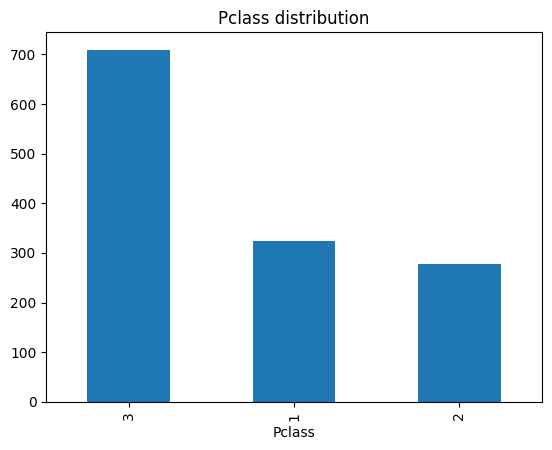

In [8]:
df['Pclass'].value_counts().plot(kind='bar')
plt.title('Pclass distribution')

**Ответ**

Больше всего людей в 3 классе

* Группировать таблицу в два уровня: класс и пол, по среднему значению возраста. Кто из возможных комбинаций самый юный, кто самый взрослый? Насколько отличаются эти значения?

Посмотрим на средние значения возраста для каждой группы:

In [9]:
group_df = df.groupby(['Sex', 'Pclass'])['Age'].mean().sort_values()
group_df

<ipython-input-9-2d87dde0c1e1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_df = df.groupby(['Sex', 'Pclass'])['Age'].mean().sort_values()


,,Age
Sex,Pclass,
female,3,22.185329
male,3,25.962264
female,2,27.499223
male,2,30.815380
female,1,37.037594
male,1,41.029272


Найдем разность крайних значений:

In [10]:
group_df.max() - group_df.min()

18.843942575810384

**Ответ**

Из возможных комбинаций самые юные - это девушки 3 класса, самые старые - мужчины 1 класса, максимальная разность значений - 18.843942575810384


* Отобрать только выживших пассажиров с фамилией, начинающейся на “K”. Отсортировать их по убыванию стоимости билета. Кто заплатил больше всех? Кто меньше всех?

In [11]:
df[(df['Survived'] == 1) & (df['Name'].str.startswith('K'))].sort_values(by='Fare', ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1.0,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1.0,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1.0,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1.0,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1.0,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S
691,692,1.0,3,"Karun, Miss. Manca",female,4.0,0,1,349256,13.4167,NaN,C
303,304,1.0,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
300,301,1.0,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
573,574,1.0,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q


**Ответ**

Больше всех заплатил некто "Kimball, Mr. Edwin Nelson Jr", меньше всех - "Kelly, Miss. Mary"

* Какое максимальное количество родных было с выжившим пассажиром?
Рассмотрим суммарное число родителей, детей, братьев, сестер, супругов, отберем по выжившим

In [12]:
df['TotalRelatives'] = df['SibSp'] + df['Parch']
print(df[df['Survived'] == 1]['TotalRelatives'].max())
df.drop(columns=['TotalRelatives'])

6


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Ответ**

Максимальное количество родных - 6

* Посчитайте среднюю стоимость билета пассажиров, для которых указана каюта (Cabin) и для тех, у кого она не указана, во сколько раз они отличаются?

In [13]:
notnone = df[df['Cabin'].notna()]['Fare'].mean()
isnone = df[df['Cabin'].isna()]['Fare'].mean()
notnone/isnone

4.282143526350037

**Ответ**


Соотношение - 4.282143526350037

## Визуализация

### Scatter plot

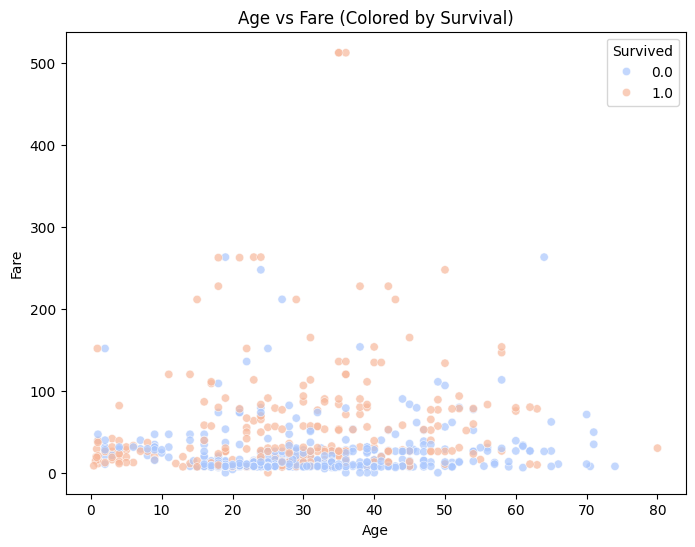

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived', palette='coolwarm', alpha=0.7)
plt.title('Age vs Fare (Colored by Survival)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

### Linear plot

<ipython-input-15-84c334ba897a>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  male_survival_rate = df_copy[df_copy['Sex'] == 'male'].groupby('AgeGroup')['Survived'].mean()
<ipython-input-15-84c334ba897a>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  female_survival_rate = df_copy[df_copy['Sex'] == 'female'].groupby('AgeGroup')['Survived'].mean()


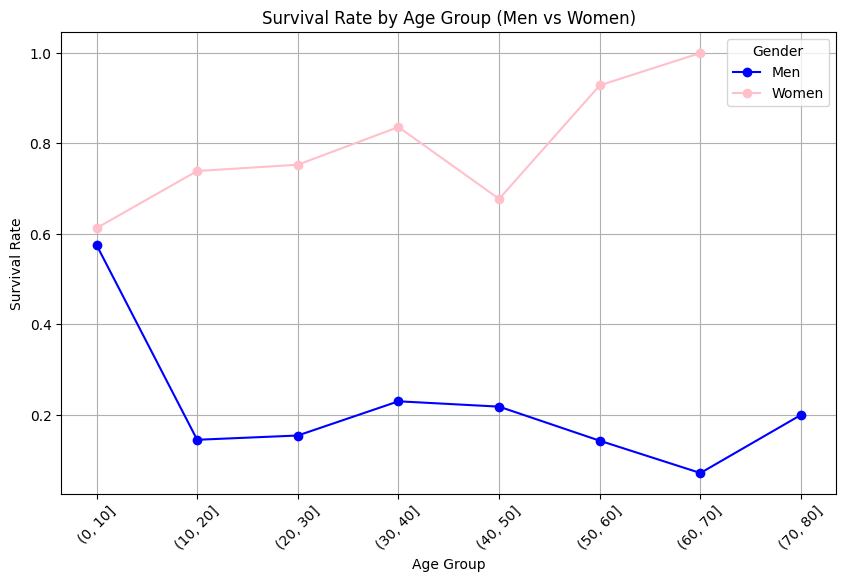

In [15]:
df_copy = df.copy()
df_copy['Survived'] = pd.to_numeric(df_copy['Survived'], errors='coerce')

df_copy['AgeGroup'] = pd.cut(df_copy['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

male_survival_rate = df_copy[df_copy['Sex'] == 'male'].groupby('AgeGroup')['Survived'].mean()
female_survival_rate = df_copy[df_copy['Sex'] == 'female'].groupby('AgeGroup')['Survived'].mean()

plt.figure(figsize=(10, 6))
plt.plot(male_survival_rate.index.astype(str), male_survival_rate.values, marker='o', linestyle='-', label='Men', color='blue')
plt.plot(female_survival_rate.index.astype(str), female_survival_rate.values, marker='o', linestyle='-', label='Women', color='pink')

plt.title('Survival Rate by Age Group (Men vs Women)')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Gender')
plt.show()

### Histogram

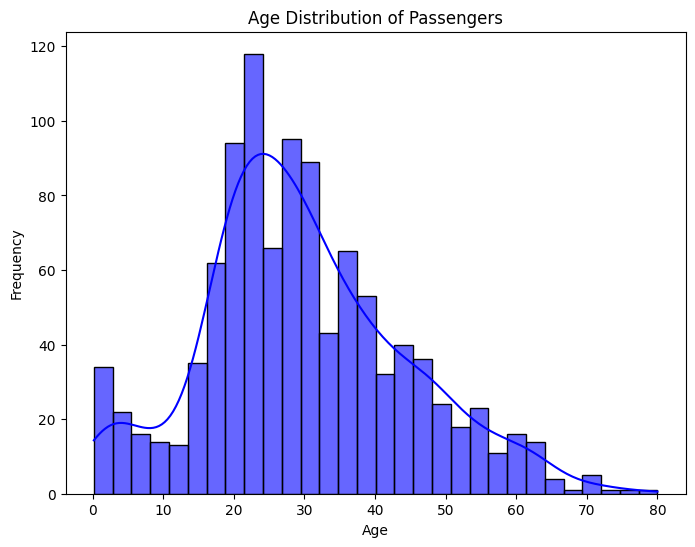

In [16]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=30, kde=True, color='blue', alpha=0.6)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


### Bar chart

<ipython-input-17-003840c72c15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Pclass'].value_counts().index, y=df['Pclass'].value_counts().values, palette='viridis')


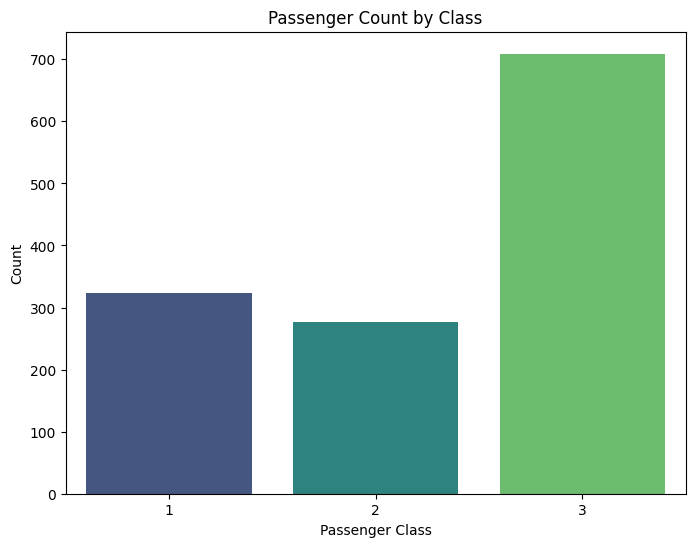

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Pclass'].value_counts().index, y=df['Pclass'].value_counts().values, palette='viridis')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


### Horizontal bar chart

<ipython-input-18-8cc106aad194>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Embarked'].value_counts().values, y=df['Embarked'].value_counts().index, palette='coolwarm')


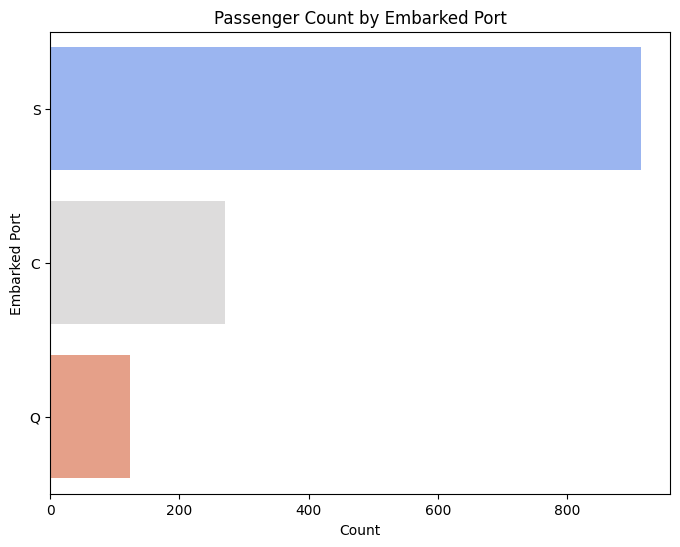

In [18]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df['Embarked'].value_counts().values, y=df['Embarked'].value_counts().index, palette='coolwarm')
plt.title('Passenger Count by Embarked Port')
plt.xlabel('Count')
plt.ylabel('Embarked Port')
plt.show()


### Interactive scatter plot

In [19]:
fig = px.scatter(df, x='Age', y='Fare', color='Survived', title='Age vs Fare (Interactive)',
                 labels={'Age': 'Age', 'Fare': 'Fare', 'Survived': 'Survived'},
                 hover_data=['Name', 'Pclass'])
fig.show()


### Interactive pie diagram

In [20]:
survival_counts = df['Survived'].value_counts()
fig = px.pie(values=survival_counts.values, names=['Did Not Survive', 'Survived'],
             title='Survival Proportion', hole=0.3)
fig.show()


### Interactive box plot

In [21]:
fig = px.box(df, x='Pclass', y='Fare', color='Survived',
             title='Fare Distribution by Class and Survival',
             labels={'Pclass': 'Passenger Class', 'Fare': 'Fare', 'Survived': 'Survived'})
fig.show()


### Interactive histogram + box plot

In [22]:
df_copy = df.copy()
df_copy['Survived'] = df_copy['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

fig = px.histogram(
    df_copy,
    x='Age',
    color='Survived',
    nbins=30,
    title='Age Distribution by Survival Status',
    labels={'Age': 'Passenger Age', 'count': 'Number of Passengers'},
    marginal='box',
    barmode='overlay'
)

fig.update_layout(bargap=0.1)
fig.show()


### Interactive sunburst

In [23]:
df_copy = df.copy()
df_copy['Survived'] = df_copy['Survived'].map({0: 'Did Not Survive', 1: 'Survived'})

df_copy = df_copy.dropna(subset=['Pclass', 'Survived'])

fig = px.sunburst(
    df_copy,
    path=['Pclass', 'Survived'],
    values='Fare',
    title='Sunburst Chart: Passenger Class → Survival Status',
    color='Survived',
    color_discrete_map={
        'Did Not Survive': 'red',
        'Survived': 'green'
    }
)

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Interactive 3D

In [24]:


fig = px.scatter_3d(df, x='Age', y='Fare', z='Pclass', color='Survived',
                    title='3D Plot: Age, Fare, and Passenger Class',
                    labels={'Age': 'Age', 'Fare': 'Fare', 'Pclass': 'Passenger Class'})
fig.show()

### Sankey diagram

In [25]:
data = df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')

nodes = list(data['Pclass'].astype(str).unique()) + list(data['Sex'].unique()) + list(data['Survived'].unique())
node_indices = {node: i for i, node in enumerate(nodes)}

sources = []
targets = []
values = []

# From Pclass to Sex
for _, row in data.iterrows():
    sources.append(node_indices[str(row['Pclass'])])
    targets.append(node_indices[row['Sex']])
    values.append(row['Count'])

# From Sex to Survived
for _, row in data.iterrows():
    sources.append(node_indices[row['Sex']])
    targets.append(node_indices[row['Survived']])
    values.append(row['Count'])

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(title_text="Titanic Passenger Flow: Pclass → Sex → Survival", font_size=10)
fig.show()


<ipython-input-25-f82211d23e96>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

